/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

Accuracy: 0.3333333333333333
Precision: 0.1111111111111111
Recall: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

      Sports       0.33      1.00      0.50         1
      Health       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



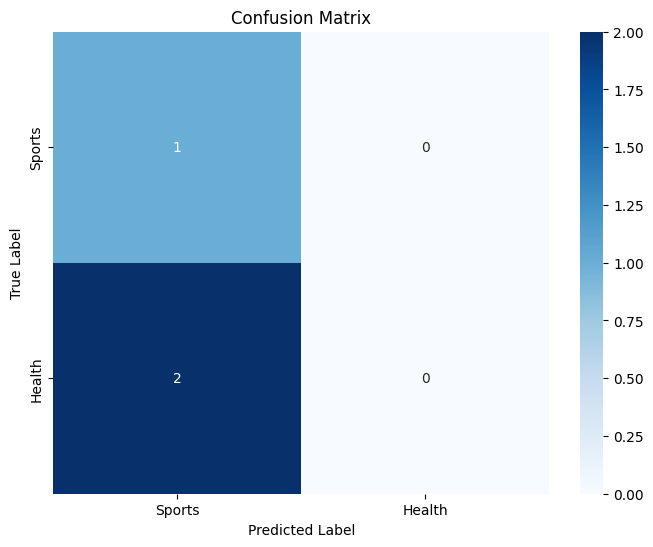

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define custom data
documents = [
    "The football team won the championship after a thrilling match",
    "A balanced diet is essential for maintaining good health",
    "The basketball player scored a record number of points",
    "Regular exercise can help prevent chronic diseases",
    "The tennis tournament was postponed due to rain",
    "Proper hydration is key during intense physical activity",
    "The soccer league is considering new rule changes",
    "Yoga and meditation contribute to mental well-being",
    "The athlete broke the world record in the 100m sprint",
    "Eating fruits and vegetables boosts the immune system"
]

labels = ["Sports", "Health", "Sports", "Health", "Sports", "Health", "Sports", "Health", "Sports", "Health"]

# Map labels to numeric values
label_mapping = {"Sports": 0, "Health": 1}
labels_numeric = [label_mapping[label] for label in labels]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(documents, labels_numeric, test_size=0.3, random_state=42)

# Initialize the CountVectorizer and transform the text data to feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the Naïve Bayes classifier
model = MultinomialNB()

# Train the classifier
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=label_mapping.keys())

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Classification Report:')
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=list(label_mapping.values()))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()